In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/DATASETS/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

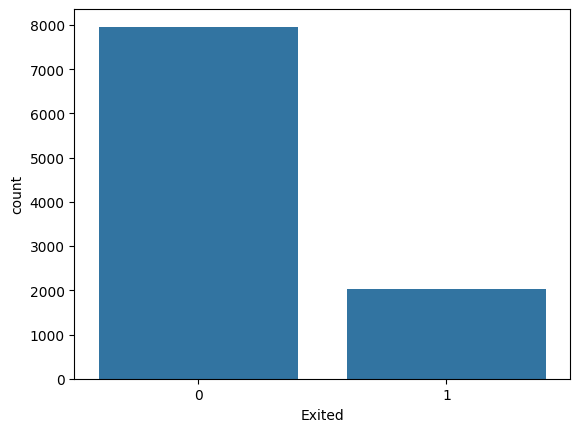

In [ ]:
sns.countplot(x='Exited', data=df)

In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis =1, inplace =True)

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Text(0.5, 1.0, 'Cpuntry Names vs Customer')

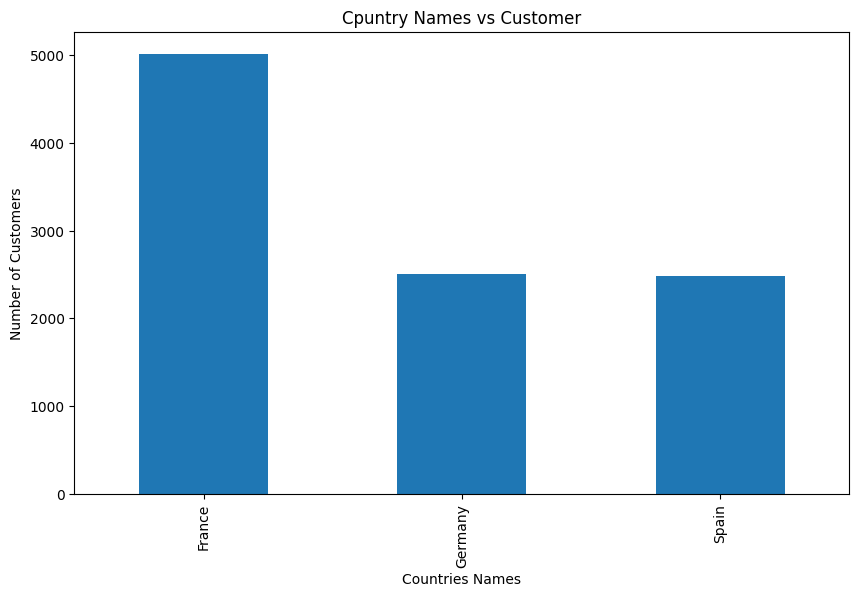

In [ ]:
plt.figure(figsize=(10,6))
df['Geography'].value_counts().plot(kind='bar')
plt.xlabel('Countries Names')
plt.ylabel('Number of Customers')
plt.title('Cpuntry Names vs Customer')

Text(0.5, 1.0, 'Comparison between Gender and Number of Customers')

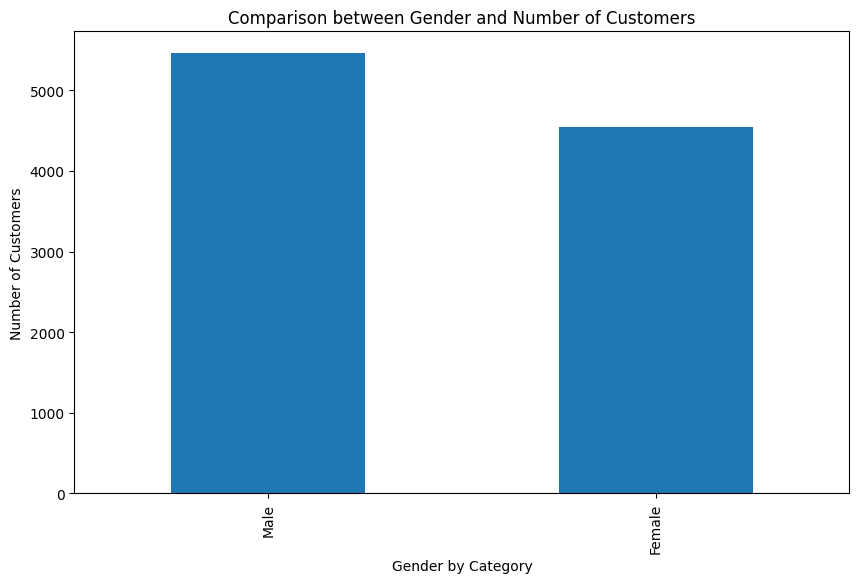

In [ ]:
plt.figure(figsize=(10,6))
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender by Category')
plt.ylabel('Number of Customers')
plt.title('Comparison between Gender and Number of Customers')

Text(0.5, 1.0, 'Exited or not Exited')

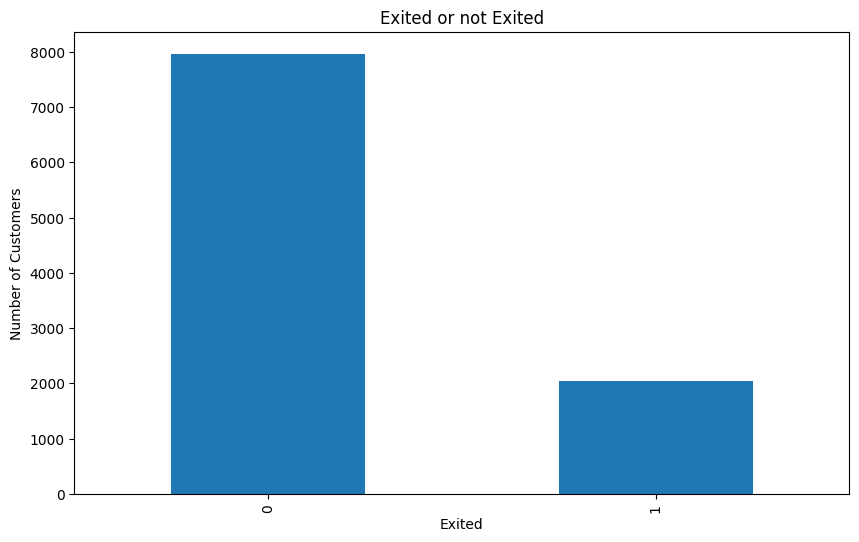

In [ ]:

plt.figure(figsize=(10,6))
df['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited')
plt.ylabel('Number of Customers')
plt.title('Exited or not Exited')

In [ ]:
g_labels = ['Male', 'Female']
x_labels = [0, 1]
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=x_labels, values=df['Exited'].value_counts(), name="Exited"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Exited Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Exited', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

45.4% of Customers are Females while 54.6% are Males.
20.4% of Customers exited the bank while  79.65% are retained in the bank

In [ ]:
df['Exited'][ df['Exited'] == 0 ].groupby(by=df['Gender']).value_counts()

Gender  Exited
Female  0         3404
Male    0         4559
Name: count, dtype: int64

In [ ]:
df['Exited'][df['Exited']== 1].groupby(by=df['Gender']).value_counts()

Gender  Exited
Female  1         1139
Male    1          898
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

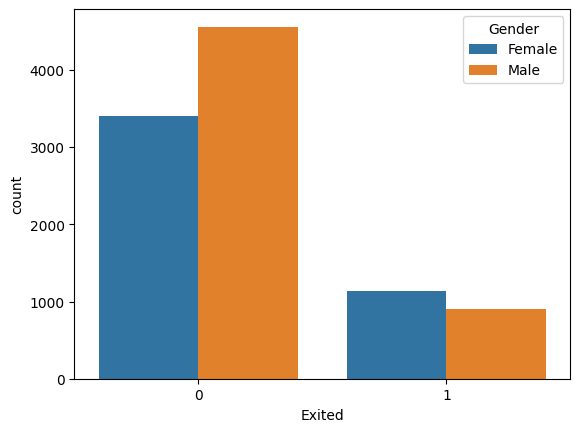

In [ ]:
sns.countplot(x='Exited', hue='Gender', data=df)

<Axes: xlabel='Exited', ylabel='count'>

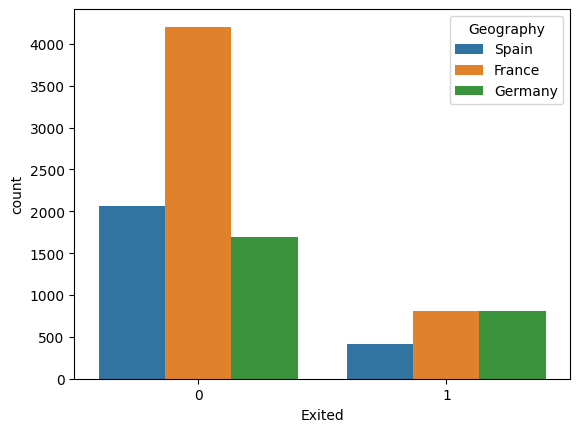

In [ ]:
sns.countplot(x='Exited', hue='Geography', data=df)

<Axes: xlabel='IsActiveMember', ylabel='count'>

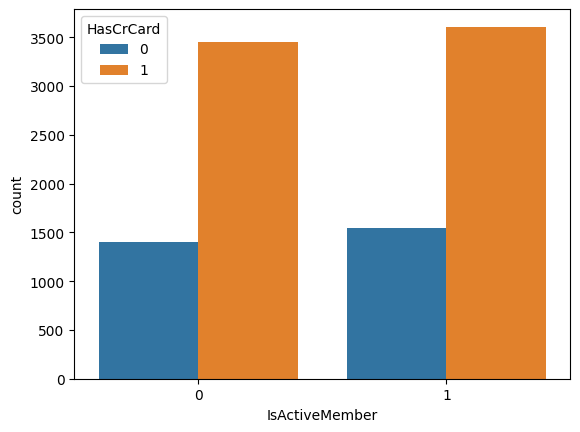

In [ ]:
sns.countplot(x='IsActiveMember', hue='HasCrCard', data=df)

<Axes: xlabel='IsActiveMember', ylabel='count'>

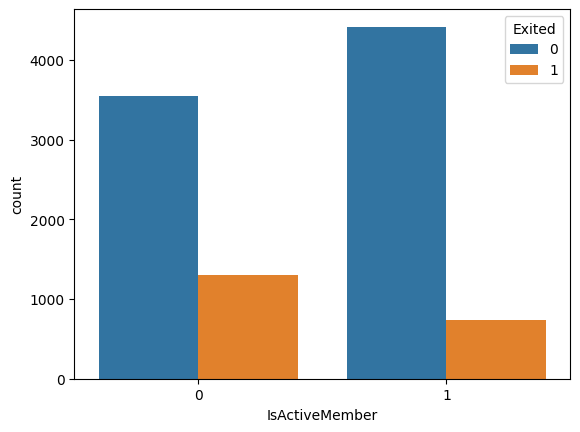

In [ ]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df)

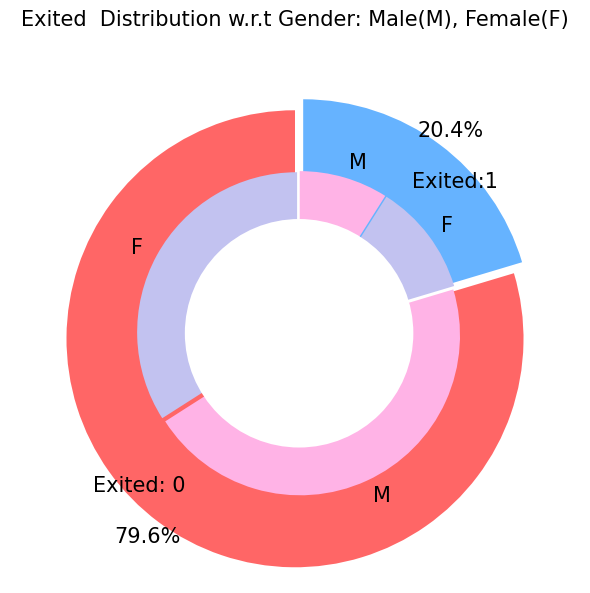

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Exited: 0","Exited:1"]
values = [7963,2037]
labels_gender = ["F","M","F","M"]
sizes_gender = [3404,4559 , 1139,898]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Exited  Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

There is a significant difference in customer percentage or count for those who exited the bank. Both genders behaved in similiar fashion when it comes to exiting the bank.


<Axes: ylabel='Frequency'>

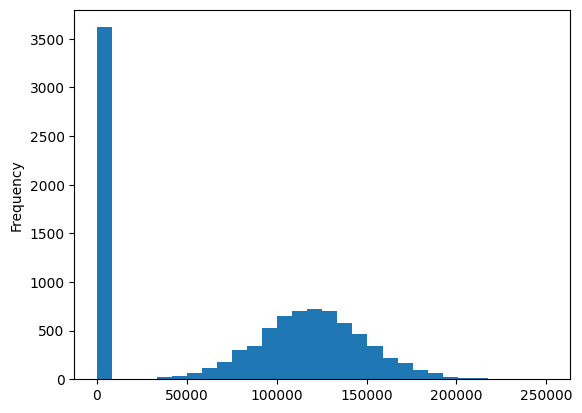

In [ ]:
df['Balance'].plot(kind='hist', bins=30)

In [ ]:
color_map = {0:  '#00CC96', 1: '#B6E880'}
fig = px.histogram(df, x="Exited", color="IsActiveMember", title="<b>Active Members who exited the bank</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {0:  '#00CC96', 1: '#B6E880'}
fig = px.histogram(df, x="Exited", color="NumOfProducts", title="<b>Active Members who exited the bank</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {0:  '#00CC96', 1: '#B6E880'}
fig = px.histogram(df, x="Exited", color="HasCrCard", title="<b>Active Members who exited the bank</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

<ipython-input-31-9998214fa6b2>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-31-9998214fa6b2>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Distribution of Estimated Salary by Exited')

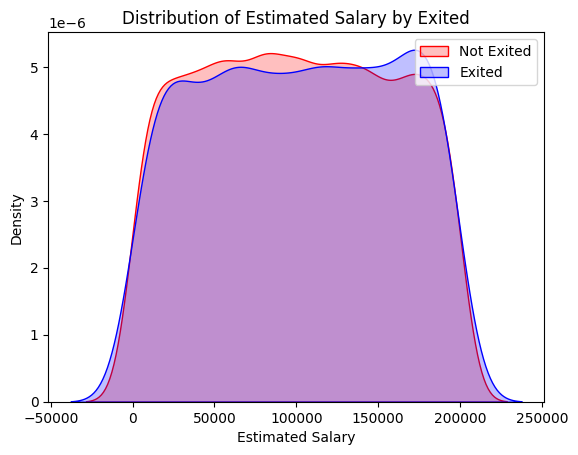

In [ ]:
ax =sns.kdeplot (df.EstimatedSalary[(df['Exited']== 0)], color="Red", shade = True)
ax =sns.kdeplot (df.EstimatedSalary[(df['Exited']== 1)], ax =ax, color="Blue", shade= True)
ax.legend(["Not Exited","Exited"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Estimated Salary')
ax.set_title('Distribution of Estimated Salary by Exited')

<ipython-input-32-bc5bacc1e8c6>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-32-bc5bacc1e8c6>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Distribution of HasCrCard by Exited')

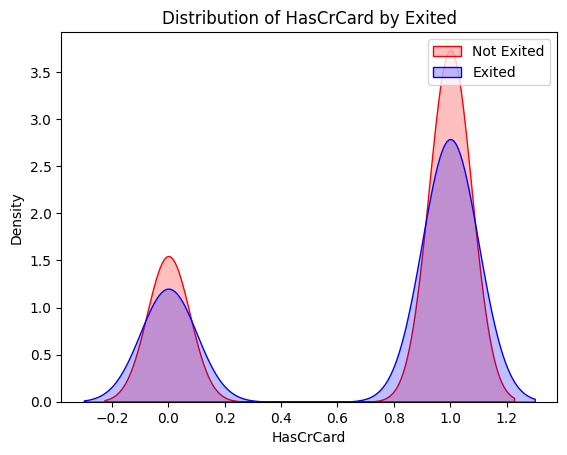

In [ ]:
ax =sns.kdeplot (df.HasCrCard[(df['Exited']== 0)], color="Red", shade = True)
ax =sns.kdeplot (df.HasCrCard[(df['Exited']== 1)], ax =ax, color="Blue", shade= True)
ax.legend(["Not Exited","Exited"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('HasCrCard')
ax.set_title('Distribution of HasCrCard by Exited')

In [ ]:
fig = px.box(df, x='Exited', y = 'Tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Exited', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Exited</b>',
)

fig.show()

<Axes: >

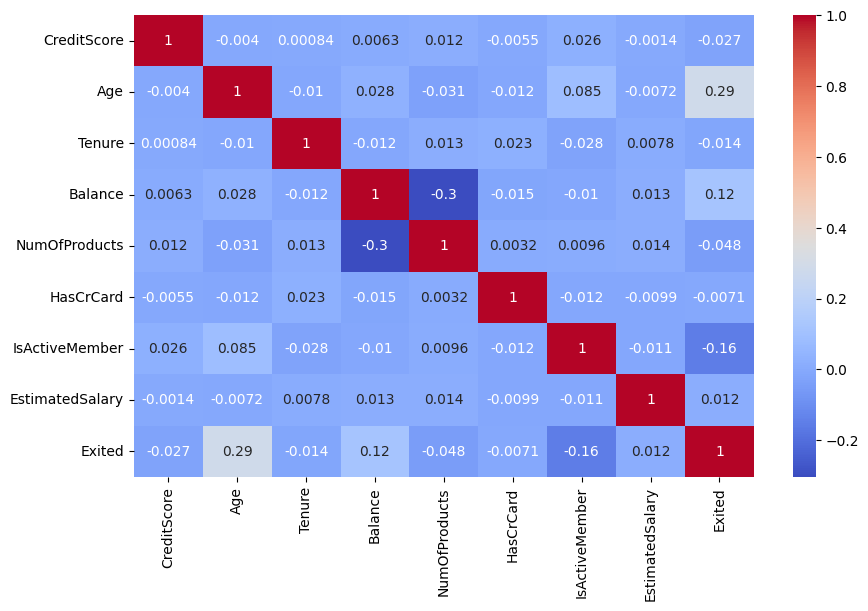

In [ ]:
#numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'HasCrCard', 'IsActiveMember','Exited']
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')


FEATURE ENGINEERING AND DATA MODELING


In [ ]:

le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
sc =  StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf_predicted = rf.predict(X_test_scaled)

In [ ]:
rf_score = accuracy_score(y_test, rf_predicted)
print (rf_score)

0.87


In [ ]:
conf_matrix = confusion_matrix(y_test, rf_predicted)
print(conf_matrix)

[[2569   88]
 [ 341  302]]


In [ ]:
class_report = classification_report(y_test, rf_predicted)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.77      0.47      0.58       643

    accuracy                           0.87      3300
   macro avg       0.83      0.72      0.75      3300
weighted avg       0.86      0.87      0.86      3300



In [ ]:
importances = rf.feature_importances_
Feature_names = X.columns
Feature_importance = pd.DataFrame({'Features': Feature_names, 'importance': importances})
Feature_importance = Feature_importance.sort_values(by='importance', ascending=False)
Feature_importance

,Features,importance
3,Age,0.235511
9,EstimatedSalary,0.147070
0,CreditScore,0.143436
5,Balance,0.140185
6,NumOfProducts,0.129370
4,Tenure,0.082163
8,IsActiveMember,0.044857
1,Geography,0.038324
7,HasCrCard,0.019845
2,Gender,0.019240


<Axes: ylabel='Features'>

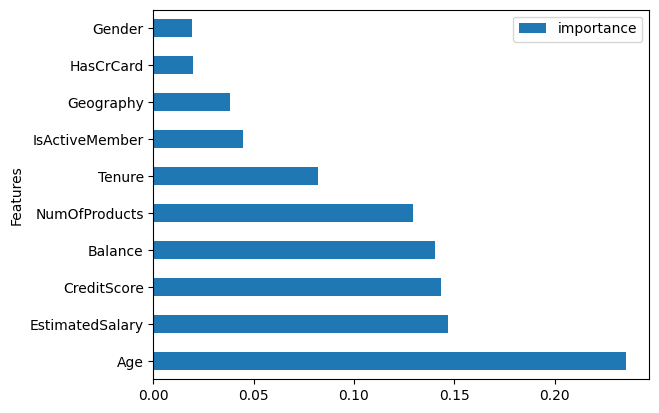

In [ ]:
# prompt: Using dataframe Feature_importance:

Feature_importance.plot.barh(x='Features', y='importance')


In [ ]:
# Feature selection: removing low-importance features
threshold = 0.1  # Example threshold for importance
new_features = Feature_importance[Feature_importance['importance'] > threshold]['Features']
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)

# Ensure new_features is a list
if not isinstance(new_features, list):
    new_features = new_features.tolist()
new_features = [str(feature) for feature in new_features]

print("Columns in X_train:", X_train.columns)
print("Selected new_features:", new_features)

# Proceed with feature selection if column names match
if all(feature in X_train.columns for feature in new_features):
    X_train_new = X_train.loc[:, new_features]
    X_test_new = X_test.loc[:, new_features]


X_train_new = X_train.loc[:, new_features]
X_test_new = X_test.loc[:, new_features]

# Scale the selected features
X_train_new_scaled = sc.fit_transform(X_train_new)
X_test_new_scaled = sc.transform(X_test_new)

# Retrain the model with selected features
random_forest = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest.fit(X_train_new_scaled, y_train)

# Evaluate the model with selected features
selected_score = random_forest.score(X_test_new_scaled, y_test)
print(f"Test accuracy with selected features: {selected_score}")

#Evaluate the accuracy score with the selected features
selected_predicted = random_forest.predict(X_test_new_scaled)
selected_score = accuracy_score(y_test, selected_predicted)
print(f"Accuracy score with selected features: {selected_score}")

# Cross-validation with selected features
cross_val_scores = cross_val_score(random_forest, X_train_new_scaled, y_train, cv=5)
print(f"Cross-validation scores with selected features: {cross_val_scores}")
print(f"Mean cross-validation score: {np.mean(cross_val_scores)}")

Columns in X_train: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
Selected new_features: ['Age', 'EstimatedSalary', 'CreditScore', 'Balance', 'NumOfProducts']
Test accuracy with selected features: 0.8390909090909091
Accuracy score with selected features: 0.8390909090909091
Cross-validation scores with selected features: [0.82014925 0.83059701 0.8261194  0.81716418 0.81716418]
Mean cross-validation score: 0.8222388059701492


HyperParameter Tuning for Random Forest Classifier

In [ ]:
grid_params = [
    {"n_estimators": [50,100,150,200,250,300],
    "criterion": ["gini", "entropy"],
    "max_features": ["auto", "sqrt", "log2"],
    },
]

In [ ]:
rf_cv =GridSearchCV(estimator = rf, param_grid=grid_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=10)

In [ ]:
rf_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [50, 100, 150, 200, 250, 300]}],
             scoring='accuracy', verbose=10)

In [ ]:
best_model = rf_cv.best_estimator_
print(best_model)

RandomForestClassifier(criterion='entropy', n_estimators=50)


In [ ]:
best_model = rf_cv.best_params_
print(best_model)

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50}


RETRAIN WITH NEW FEATURES

In [ ]:
rf = RandomForestClassifier(criterion='entropy', max_features='sqrt', n_estimators=50)
rf.fit(X_train_scaled, y_train)
rf_predicted = rf.predict(X_test_scaled)
rf_score = accuracy_score(y_test, rf_predicted)
print(rf_score)

0.8687878787878788


LOGISTICS REGRESSION MODEL

In [ ]:
Lr = LogisticRegression()
Lr.fit(X_train_scaled, y_train)
Lr_predicted = Lr.predict(X_test_scaled)

In [ ]:
lr_score = accuracy_score(y_test, Lr_predicted)
print(lr_score)

0.8178787878787879


In [ ]:
lr_conf_matrix = confusion_matrix(y_test, Lr_predicted)
print(lr_conf_matrix)

[[2584   73]
 [ 528  115]]


In [ ]:
lr_class_report = classification_report(y_test, Lr_predicted)
print(lr_class_report)

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2657
           1       0.61      0.18      0.28       643

    accuracy                           0.82      3300
   macro avg       0.72      0.58      0.59      3300
weighted avg       0.79      0.82      0.78      3300



Hyper Paremeter Tuning For Logistic Regression

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
     'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],
     }
]

In [ ]:
lr_cv = GridSearchCV(estimator =Lr, param_grid = param_grid, cv = 3, scoring ='accuracy',  n_jobs=-1, verbose = 10)

In [ ]:
best_model = lr_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


648 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

In [ ]:
best_model.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
best_model.best_estimator_

LogisticRegression(C=1)

Retrain with new parameters

In [ ]:
Lr = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='lbfgs' )
Lr.fit(X_train_scaled, y_train)
Lr_predicted = Lr.predict(X_test_scaled)
lr_score = accuracy_score(y_test, Lr_predicted)
print(lr_score)

0.8178787878787879


In [ ]:
cross_val_scores = cross_val_score(Lr, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {np.mean(cross_val_scores)}")

Cross-validation scores: [0.79701493 0.8        0.80522388 0.80298507 0.81044776]
Mean cross-validation score: 0.8031343283582089
